Evaluating the performance of a basic 1/n
portfolio

1. Import the libraries:

In [ ]:
!pip install yfinance
!pip install pyfolio

import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf


     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 91 kB 3.8 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=5761ce7095e1c57

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


2. Set up the parameters:

In [ ]:
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT', 'TWTR']
START_DATE = '2017-01-01'
END_DATE = '2018-12-31'
n_assets = len(RISKY_ASSETS)

3. Download the stock prices from Yahoo Finance:

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE, adjusted=True)

[*********************100%***********************]  4 of 4 completed


4. Calculate individual asset returns:

In [ ]:
returns = prices_df['Adj Close'].pct_change().dropna()

5. Define the weights:

In [ ]:
portfolio_weights = n_assets * [1 / n_assets]

6. Calculate the portfolio returns:

In [ ]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index=returns.index)

7. Create the tear sheet (simple variant):

Start date,2017-01-04
End date,2018-12-28
Total months,23
,Backtest
Annual return,17.7%
Cumulative returns,38.1%
Annual volatility,21.8%
Sharpe ratio,0.86
Calmar ratio,0.70
Stability,0.87
Max drawdown,-25.3%


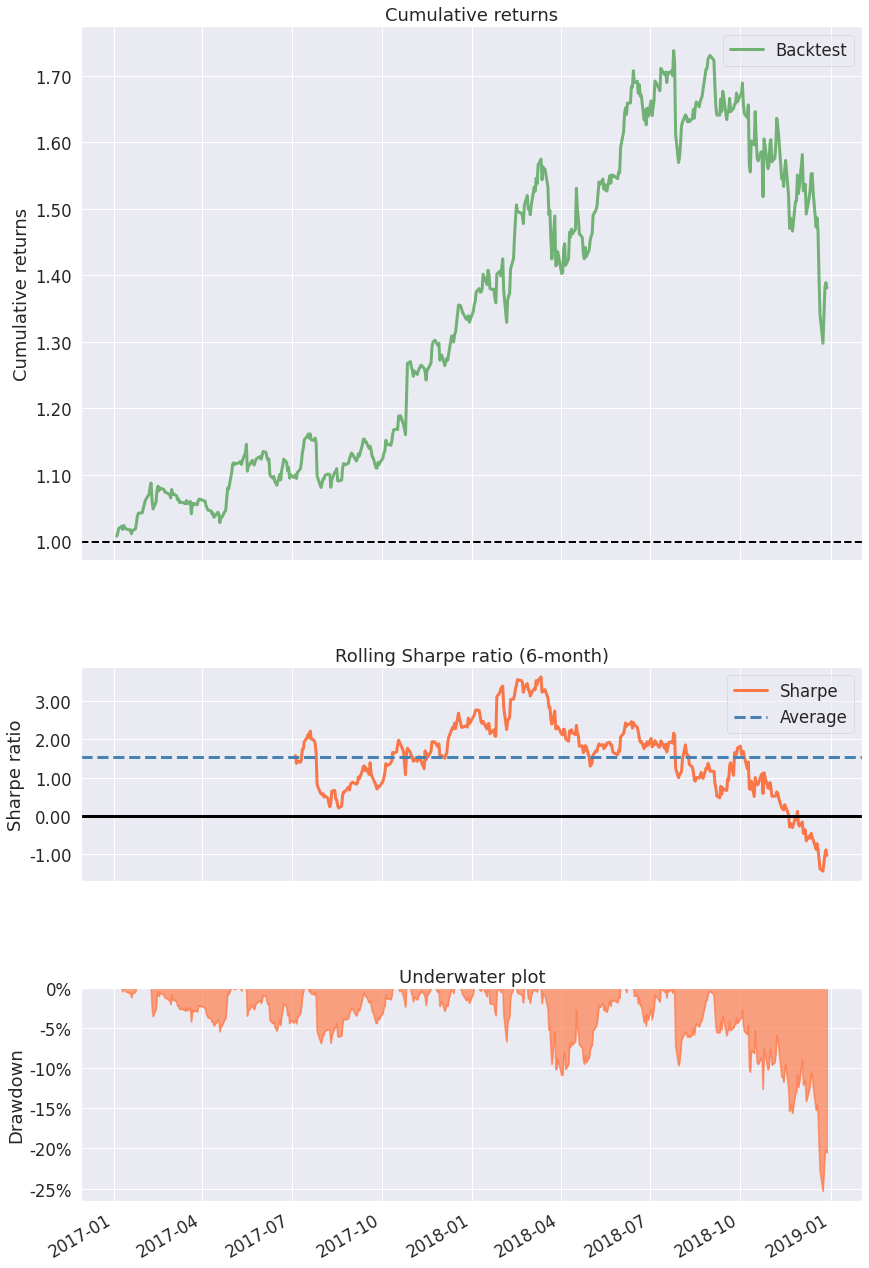

In [ ]:
pf.create_simple_tear_sheet(portfolio_returns)